In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from nltk import sent_tokenize
from nltk import pos_tag
from nltk import map_tag
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score

In [3]:
nltk.download('stopwords')
# Loading NLTK's English stop-words list
stop_words = set(stopwords.words('english'))

In [4]:
#Upload file in dataframe
df = pd.read_csv(r'/Users/davislab/Downloads/movies_genres.csv', delimiter='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117352 entries, 0 to 117351
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        117352 non-null  object
 1   plot         117352 non-null  object
 2   Action       117352 non-null  int64 
 3   Adult        117352 non-null  int64 
 4   Adventure    117352 non-null  int64 
 5   Animation    117352 non-null  int64 
 6   Biography    117352 non-null  int64 
 7   Comedy       117352 non-null  int64 
 8   Crime        117352 non-null  int64 
 9   Documentary  117352 non-null  int64 
 10  Drama        117352 non-null  int64 
 11  Family       117352 non-null  int64 
 12  Fantasy      117352 non-null  int64 
 13  Game-Show    117352 non-null  int64 
 14  History      117352 non-null  int64 
 15  Horror       117352 non-null  int64 
 16  Lifestyle    117352 non-null  int64 
 17  Music        117352 non-null  int64 
 18  Musical      117352 non-null  int64 
 19  My

In [ ]:
#Checking the # of movies per genre and selecting 20 genres 

In [5]:
df_genres = df.drop(['plot', 'title'], axis=1)
df_genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
count=[]
genres=list(df_genres.columns.values)
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Lifestyle',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [7]:
for i in genres:
    count.append((i, df_genres[i].sum()))

In [8]:
count

[('Action', 12381),
 ('Adult', 61),
 ('Adventure', 10245),
 ('Animation', 11375),
 ('Biography', 1385),
 ('Comedy', 33875),
 ('Crime', 15133),
 ('Documentary', 12020),
 ('Drama', 46017),
 ('Family', 15442),
 ('Fantasy', 7103),
 ('Game-Show', 2048),
 ('History', 2662),
 ('Horror', 2571),
 ('Lifestyle', 0),
 ('Music', 2841),
 ('Musical', 596),
 ('Mystery', 12030),
 ('News', 3946),
 ('Reality-TV', 12338),
 ('Romance', 19242),
 ('Sci-Fi', 8658),
 ('Short', 578),
 ('Sport', 1947),
 ('Talk-Show', 5254),
 ('Thriller', 8856),
 ('War', 1407),
 ('Western', 2761)]

In [9]:
df_genre_count = pd.DataFrame(count,columns=['Genre','No. of movies'])

In [10]:
df_genre_count

,Genre,No. of movies
0,Action,12381
1,Adult,61
2,Adventure,10245
3,Animation,11375
4,Biography,1385
5,Comedy,33875
6,Crime,15133
7,Documentary,12020
8,Drama,46017
9,Family,15442


In [11]:
df.drop(['Lifestyle','Reality-TV','Talk-Show','Short','News','Game-Show','Adult','Documentary'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117352 entries, 0 to 117351
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      117352 non-null  object
 1   plot       117352 non-null  object
 2   Action     117352 non-null  int64 
 3   Adventure  117352 non-null  int64 
 4   Animation  117352 non-null  int64 
 5   Biography  117352 non-null  int64 
 6   Comedy     117352 non-null  int64 
 7   Crime      117352 non-null  int64 
 8   Drama      117352 non-null  int64 
 9   Family     117352 non-null  int64 
 10  Fantasy    117352 non-null  int64 
 11  History    117352 non-null  int64 
 12  Horror     117352 non-null  int64 
 13  Music      117352 non-null  int64 
 14  Musical    117352 non-null  int64 
 15  Mystery    117352 non-null  int64 
 16  Romance    117352 non-null  int64 
 17  Sci-Fi     117352 non-null  int64 
 18  Sport      117352 non-null  int64 
 19  Thriller   117352 non-null  int64 
 20  War 

In [ ]:
#Removing plots which are not in English using langdetect library

In [18]:
pip install langdetect

     |████████████████████████████████| 981 kB 1.4 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=85dc5f06f0f9f38f11dd3b684c3f1bedb9912ac435e408f52f0cd2fda4b2e796
  Stored in directory: /Users/davislab/Library/Caches/pip/wheels/1e/80/23/0a24928ec3a3906ff5027f38d2fea824e7e97f2ba7c83d91e3
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [19]:
from langdetect import detect
df['Languagereview'] = df['plot'].apply(detect)

In [20]:
df['Languagereview'].value_counts()

en    117197
nl       120
de        14
it         6
da         5
fr         3
pt         2
es         2
hu         1
sv         1
no         1
Name: Languagereview, dtype: int64

In [21]:
df = df[df.Languagereview.isin(['en'])]

In [22]:
df

,title,plot,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Languagereview
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,en
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,en
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,en
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,en
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117347,"""Ørnen: En krimi-odyssé"" (2004)","Ørnen, an Icelandic inspector in the Danish p...",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,en
117348,"""Øyevitne"" (2014) {(#1.1)}","Two young kids, Henning and Philip are attrac...",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,en
117349,"""Øyevitne"" (2014) {(#1.3)}",Someone tries to kill a motorcycle gang membe...,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,en
117350,"""Øyevitne"" (2014) {(#1.5)}",Helen sees her investigation forward signific...,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,en


In [ ]:
#Segregating the features (plots) and labels (genres)

In [12]:
data_x = data_df[['plot']]
data_y = data_df.drop(['title', 'plot', 'Languagereview'], axis=1)
data_x,data_y

(                                                     plot
 0        #7dayslater is an interactive comedy series f...
 1        With just one week left in the workshops, the...
 2        All of the women start making strides towards...
 3        All five of these women are independent and s...
 4        Despite having gone through a life changing p...
 ...                                                   ...
 117192   Ørnen, an Icelandic inspector in the Danish p...
 117193   Two young kids, Henning and Philip are attrac...
 117194   Someone tries to kill a motorcycle gang membe...
 117195   Helen sees her investigation forward signific...
 117196   Georg Riha is and will remain the master of a...
 
 [117197 rows x 1 columns],
         Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
 0            0          0          0          0       1      0      0       0   
 1            0          0          0          0       0      0      0       0   
 2            0 

In [ ]:
#Text cleaning using NLP based techniques

In [13]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    return text

In [14]:
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [15]:
data_df['clean_plot'] = data_df['plot'].apply(lambda x: clean_text(x))

In [16]:
data_df['clean_plot'] = data_df['clean_plot'].apply(lambda x: remove_stopwords(x))

In [17]:
data_df.head()

,title,plot,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Languagereview,clean_plot
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,en,dayslater interactive comedy series featuring ...
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,en,one week left workshops women consider idea on...
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,en,women start making strides towards finding ver...
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,en,five women independent strong willed theyve fa...
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,en,despite gone life changing process past ten we...


In [ ]:
#Gensim downloader to load google-news-300 word embeddings

In [13]:
pip install gensim

     |████████████████████████████████| 24.2 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 1.4 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108247 sha256=e7f16b42884fcbcdbdeb4500d5a186ab3c82a2cd8f6f171c73e1620c31398e73
  Stored in directory: /Users/davislab/Library/Caches/pip/wheels/8c/f9/f4/4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [64]:
import gensim
import gensim.downloader
from gensim import corpora
from gensim import models
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from nltk.tokenize import word_tokenize
model = gensim.downloader.load('word2vec-google-news-300')

In [20]:
model.vocab

{'</s>': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeea30>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fcf79eee9d0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeeaf0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeebb0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeec10>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeec70>,
 '##': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeecd0>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeed30>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeed90>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeedf0>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeee50>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeeb80>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeeee0>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeef40>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeefa0>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7fcf79eeeb20>,
 'be': <gen

In [ ]:
#Converting plot summaries into vectors using word2vec word embeddings from Gensim library

In [65]:
#function to convert each plot into vectors
def word_2_vec(x):
    t1=word_tokenize(x)
    b=[model[t1] for t1 in x if t1 in model.vocab]
    v=list(map(lambda y: sum(y)/len(y), zip(*b)))
    a=np.array(v)
    return a.reshape(1,-1)

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/davislab/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [66]:
data_df['word2vec']=data_df['clean_plot'].apply(lambda x: word_2_vec(x))
data_df.head()

,title,plot,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Languagereview,clean_plot,word2vec
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,en,dayslater interactive comedy series featuring ...,"[[-0.16838925010279604, 0.1163256193462171, -0..."
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,en,one week left workshops women consider idea on...,"[[-0.15604820251464843, 0.11582260131835938, -..."
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,en,women start making strides towards finding ver...,"[[-0.16255312416174894, 0.12199067864806867, -..."
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,en,five women independent strong willed theyve fa...,"[[-0.16382057517275164, 0.10932363377939357, -..."
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,en,despite gone life changing process past ten we...,"[[-0.1539875612420551, 0.10882826982918432, -0..."


In [67]:
#Converting each feature vector of a plot in columns of dataframe
w_vec=np.concatenate(data_df['word2vec'].to_numpy(), axis=0)
w_vec.shape

(117197, 300)

In [90]:
#Preprocessing to plot the frequency of movies in each genre
df_genres = data_df.drop(['plot', 'title','Languagereview','clean_plot','word2vec'], axis=1)
df_genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
count=[]
genres=list(df_genres.columns.values)
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [92]:
for i in genres:
    count.append((i, df_genres[i].sum()))

In [93]:
df_genre_count = pd.DataFrame(count,columns=['Genre','No. of movies'])
df_genre_count

,Genre,No. of movies
0,Action,12376
1,Adventure,10243
2,Animation,11369
3,Biography,1385
4,Comedy,33870
5,Crime,15121
6,Drama,45890
7,Family,15405
8,Fantasy,7103
9,History,2662


<AxesSubplot:xlabel='Genre'>

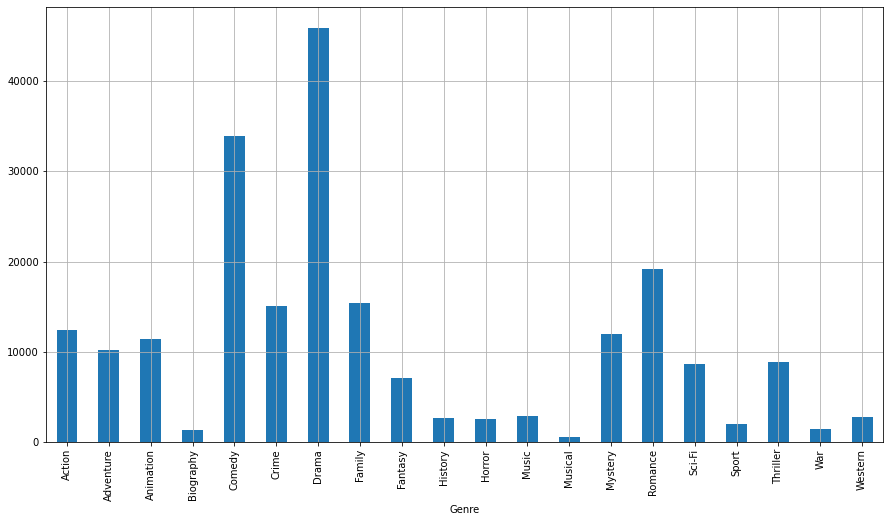

In [72]:
df_genre_count.plot(x='Genre', y='No. of movies', kind='bar', legend=False, grid=True, figsize=(15, 8))

In [ ]:
#Preparing feature dataframe consisting of vectors of each plot for XGBoost classifier

In [73]:
data_x=pd.DataFrame(w_vec)
data_x.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.168389,0.116326,-0.004209,0.147087,-0.035114,0.040183,-0.089619,-0.040101,-0.035426,0.003897,...,0.067745,-0.036464,-0.115000,0.078095,-0.024333,-0.151303,-0.071687,-0.023307,-0.099719,0.171620
1,-0.156048,0.115823,-0.004954,0.140970,-0.026205,0.028876,-0.084076,-0.019784,-0.059542,0.014275,...,0.082129,-0.029794,-0.096823,0.089532,-0.032707,-0.155375,-0.092066,-0.012761,-0.120000,0.169818
2,-0.162553,0.121991,-0.003146,0.138951,-0.050845,0.036795,-0.089185,-0.041311,-0.042299,0.018671,...,0.070247,-0.031739,-0.104807,0.096658,-0.026360,-0.153921,-0.088681,-0.027187,-0.112986,0.152604
3,-0.163821,0.109324,-0.005279,0.146554,-0.043642,0.033224,-0.080647,-0.035829,-0.051617,0.021590,...,0.072288,-0.015079,-0.093064,0.096700,-0.038344,-0.159981,-0.097118,-0.022800,-0.118490,0.148473
4,-0.153988,0.108828,-0.003710,0.146455,-0.017778,0.037750,-0.079137,-0.022527,-0.054813,0.003489,...,0.076729,-0.053616,-0.107374,0.083800,-0.023554,-0.143952,-0.079896,-0.008043,-0.114053,0.176222


In [ ]:
#Split dataset into 80:20 train-test ratio

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [75]:
data_x.shape,data_y.shape

((117197, 300), (117197, 20))

In [76]:
X_train.shape,X_test.shape

((93757, 300), (23440, 300))

In [ ]:
## Word2Vec+XGBoost model training and prediction

In [31]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBClassifier

In [78]:
XGB = XGBClassifier()
clf = OneVsRestClassifier(XGB)

In [79]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [80]:
y_predXGB = clf.predict(X_test)

In [81]:
from sklearn.metrics import jaccard_score
print('F1 score of XGBoost',f1_score(y_test, y_predXGB,average='micro'))
print('Precision score of XGBoost',precision_score(y_test, y_predXGB, average='micro'))
print('Recall score of XGBoost',recall_score(y_test, y_predXGB, average='micro'))
print('Jaccard score XGBoost',jaccard_score(y_test, y_predXGB,average='micro'))
print(classification_report(y_test, y_predXGB, target_names=df_genre_count['Genre']))

F1 score of XGBoost 0.21104573216147773
Precision score of XGBoost 0.550354472176362
Recall score of XGBoost 0.13055497961158338
Jaccard score XGBoost 0.11797156358640215
              precision    recall  f1-score   support

      Action       0.57      0.04      0.08      2439
   Adventure       0.31      0.01      0.02      2024
   Animation       0.50      0.07      0.12      2276
   Biography       1.00      0.01      0.03       284
      Comedy       0.48      0.12      0.19      6785
       Crime       0.28      0.01      0.02      3063
       Drama       0.58      0.44      0.50      9204
      Family       0.41      0.03      0.06      3105
     Fantasy       0.47      0.02      0.03      1420
     History       0.33      0.01      0.02       504
      Horror       0.33      0.00      0.00       513
       Music       0.91      0.14      0.24       592
     Musical       0.00      0.00      0.00       107
     Mystery       0.25      0.00      0.00      2459
     Romance      

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Used the cleaned plot as feature for training other models and split the feature and genre data into train-test sets in 80:20 ratio

In [65]:
data_x = data_df[['clean_plot']]

In [83]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [ ]:
#Text feature extraction using TF-IDF and CountVectorizer 
#Transforming plots into lists to pass to CountVectorizer & TF-IDFVectorizer

In [84]:
X_train_new=X_train_new.to_numpy()
train_x = [x[0].strip() for x in X_train_new.tolist()]

In [85]:
X_test_new=X_test_new.to_numpy()
test_x= [x[0].strip() for x in X_test_new.tolist()]

In [ ]:
#SVM(default) model training and prediction

In [86]:
pipelineSVC = Pipeline([('vect',CountVectorizer()),('clf', OneVsRestClassifier(LinearSVC(max_iter=10000))),])

In [87]:
pipelineSVC.fit(train_x,y_train_new)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(max_iter=10000)))])

In [88]:
y_predSVClin = pipelineSVC.predict(test_x)

In [96]:
print(classification_report(y_test_new, y_predSVClin, target_names=df_genre_count['Genre']))
print('Jaccard score Linear SVC',jaccard_score(y_test_new, y_predSVClin,average='micro'))

              precision    recall  f1-score   support

      Action       0.70      0.66      0.68      2439
   Adventure       0.64      0.60      0.62      2024
   Animation       0.78      0.72      0.75      2276
   Biography       0.40      0.23      0.29       284
      Comedy       0.74      0.74      0.74      6785
       Crime       0.72      0.72      0.72      3063
       Drama       0.80      0.80      0.80      9204
      Family       0.66      0.65      0.66      3105
     Fantasy       0.68      0.61      0.64      1420
     History       0.56      0.42      0.48       504
      Horror       0.49      0.36      0.42       513
       Music       0.75      0.62      0.68       592
     Musical       0.60      0.34      0.43       107
     Mystery       0.64      0.60      0.62      2459
     Romance       0.76      0.76      0.76      3824
      Sci-Fi       0.70      0.65      0.67      1772
       Sport       0.72      0.57      0.64       393
    Thriller       0.59    

In [ ]:
#SVM+TF-IDF model training and prediction

In [45]:
pipelineSVC = Pipeline([('tfidf', TfidfVectorizer()),('clf', OneVsRestClassifier(LinearSVC())),])

In [46]:
pipelineSVC.fit(train_x,y_train_new)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(estimator=LinearSVC()))])

In [50]:
y_predSVC = pipelineSVC.predict(test_x)

In [51]:
print('F1 score of linear SVC',f1_score(y_test_new, y_predSVC,average='micro'))
print('Precision score of linear SVC',precision_score(y_test_new, y_predSVC, average='micro'))
print('Recall score of linear SVC',recall_score(y_test_new, y_predSVC, average='micro'))

F1 score of linear SVC 0.7578111957261554
Precision score of linear SVC 0.8561604085659567
Recall score of linear SVC 0.679729075955491


In [52]:
print('Jaccard score Linear SVC',jaccard_score(y_test_new, y_predSVC,average='micro'))

Jaccard score Linear SVC 0.6100612025473493


In [55]:
print(classification_report(y_test_new, y_predSVC, target_names=df_genre_count['Genre']))

              precision    recall  f1-score   support

      Action       0.87      0.63      0.73      2439
   Adventure       0.84      0.56      0.67      2024
   Animation       0.89      0.71      0.79      2276
   Biography       0.75      0.10      0.17       284
      Comedy       0.83      0.74      0.78      6785
       Crime       0.85      0.72      0.78      3063
       Drama       0.85      0.82      0.84      9204
      Family       0.83      0.63      0.71      3105
     Fantasy       0.88      0.56      0.69      1420
     History       0.77      0.33      0.47       504
      Horror       0.84      0.27      0.40       513
       Music       0.91      0.57      0.70       592
     Musical       1.00      0.26      0.41       107
     Mystery       0.82      0.59      0.69      2459
     Romance       0.90      0.75      0.82      3824
      Sci-Fi       0.88      0.62      0.72      1772
       Sport       0.89      0.50      0.64       393
    Thriller       0.84    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#TF-IDF+XGBoost model training and prediction

In [86]:
pipelineXGB = Pipeline([('tfidf', TfidfVectorizer()),('clf',OneVsRestClassifier(XGBClassifier())),])
pipelineXGB.fit(train_x,y_train_new)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_delta_step=None,
                                      

In [87]:
y_predXGBtfidf = pipelineXGB.predict(test_x)

In [88]:
print('F1 score of XGBoosttfidf',f1_score(y_test_new, y_predXGBtfidf,average='micro'))
print('Precision score of XGBoosttfidf',precision_score(y_test_new, y_predXGBtfidf, average='micro'))
print('Recall score of XGBoosttfidf',recall_score(y_test_new, y_predXGBtfidf, average='micro'))
print('Jaccard score XGBoosttfidf',jaccard_score(y_test_new, y_predXGBtfidf,average='micro'))
print(classification_report(y_test, y_predXGBtfidf, target_names=df_genre_count['Genre']))

F1 score of XGBoosttfidf 0.5525846702317291
Precision score of XGBoosttfidf 0.8444665529657002
Recall score of XGBoosttfidf 0.4106480521574861
Jaccard score XGBoosttfidf 0.3817733990147783
              precision    recall  f1-score   support

      Action       0.90      0.32      0.48      2439
   Adventure       0.81      0.25      0.38      2024
   Animation       0.85      0.25      0.39      2276
   Biography       0.66      0.10      0.17       284
      Comedy       0.84      0.38      0.52      6785
       Crime       0.81      0.50      0.62      3063
       Drama       0.82      0.63      0.71      9204
      Family       0.88      0.23      0.36      3105
     Fantasy       0.84      0.28      0.41      1420
     History       0.72      0.20      0.31       504
      Horror       0.85      0.16      0.27       513
       Music       0.88      0.45      0.59       592
     Musical       0.82      0.21      0.34       107
     Mystery       0.81      0.38      0.52      2459


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Multinomial Naive Bayes model training and prediction

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
X_train_counts = count_vect.fit_transform(train_x)

In [98]:
X_test_counts = count_vect.transform(test_x)

In [34]:
MNB = MultinomialNB()
clf = OneVsRestClassifier(MNB)
clf.fit(X_train_counts, y_train_new)

OneVsRestClassifier(estimator=MultinomialNB())

In [35]:
y_predNB = clf.predict(X_test_counts)

In [36]:
print('F1 score of MNB',f1_score(y_test_new, y_predNB,average='micro'))
print('Precision score of MNB',precision_score(y_test_new, y_predNB, average='micro'))
print('Recall score of MNB',recall_score(y_test_new, y_predNB, average='micro'))
print('Jaccard score MNB',jaccard_score(y_test_new, y_predNB,average='micro'))

F1 score of MNB 0.7107804810743688
Precision score of MNB 0.7094915643291633
Recall score of MNB 0.71207408943258
Jaccard score MNB 0.5513261866114907


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_predNB, target_names=df_genre_count['Genre']))

              precision    recall  f1-score   support

      Action       0.71      0.66      0.69      2439
   Adventure       0.57      0.63      0.60      2024
   Animation       0.75      0.75      0.75      2276
   Biography       0.33      0.04      0.06       284
      Comedy       0.77      0.77      0.77      6785
       Crime       0.71      0.80      0.75      3063
       Drama       0.76      0.85      0.80      9204
      Family       0.70      0.65      0.67      3105
     Fantasy       0.69      0.57      0.63      1420
     History       0.52      0.43      0.47       504
      Horror       0.64      0.12      0.21       513
       Music       0.71      0.46      0.56       592
     Musical       0.67      0.04      0.07       107
     Mystery       0.57      0.70      0.63      2459
     Romance       0.73      0.78      0.75      3824
      Sci-Fi       0.68      0.64      0.66      1772
       Sport       0.83      0.31      0.45       393
    Thriller       0.55    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Binary Naive Bayes model training and prediction

In [99]:
count_vect = CountVectorizer(analyzer='word',binary=True)
X_train_counts_b = count_vect.fit_transform(train_x)

In [100]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
clf = OneVsRestClassifier(BNB)
clf.fit(X_train_counts_b, y_train_new)

OneVsRestClassifier(estimator=BernoulliNB())

In [101]:
y_predB = clf.predict(X_test_counts)

In [102]:
print('F1 score of BNB',f1_score(y_test_new, y_predB,average='micro'))
print('Precision score of BNB',precision_score(y_test_new, y_predB, average='micro'))
print('Recall score of BNB',recall_score(y_test_new, y_predB, average='micro'))
print('Jaccard score BNB',jaccard_score(y_test_new, y_predB,average='micro'))
print(classification_report(y_test_new, y_predB, target_names=df_genre_count['Genre']))

F1 score of BNB 0.6340430599849144
Precision score of BNB 0.744885268329084
Recall score of BNB 0.5519155896514387
Jaccard score BNB 0.4641749980624661
              precision    recall  f1-score   support

      Action       0.73      0.46      0.56      2439
   Adventure       0.62      0.41      0.49      2024
   Animation       0.80      0.58      0.67      2276
   Biography       0.12      0.00      0.01       284
      Comedy       0.79      0.68      0.73      6785
       Crime       0.74      0.61      0.67      3063
       Drama       0.79      0.75      0.77      9204
      Family       0.77      0.48      0.60      3105
     Fantasy       0.71      0.31      0.43      1420
     History       0.50      0.11      0.18       504
      Horror       0.26      0.03      0.05       513
       Music       0.86      0.19      0.31       592
     Musical       0.00      0.00      0.00       107
     Mystery       0.60      0.47      0.53      2459
     Romance       0.74      0.68    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
